# SEIS 631 - Final Project - Group 4
Yue Cade \
Tony Challeen \
Siphosenkosi Mpofu \
Jason Shapiro \
Brian Susick

In [2]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

Q1) Show me the market trends to help me decide. Which US real-estate market is doing best overall. -Jason

* Assumptions:
    * For general market trends, we're going to stick with smoothed/seasonal data
    * The market was affected by the pandemic, so we're going to stick with short term data, 1-2 years.
    * To begin, we'll look at home value forcasts to get a general sense of which regional markets we want to focus in on
    

In [20]:
# Load the data

# Zillow Home Value Forecast (ZHVF): 
# Each numerical value represents the projected percentage change. 
# Example: 0.2 = 2% increase; -0.2 = 2% decrease in home values

df = pd.read_csv("data/Metro_zhvf_growth_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

display(df.head(5))  
display(df.tail(5))
display(df.count())

FileNotFoundError: [Errno 2] No such file or directory: 'data/Metro_zhvf_growth_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv'

In [ ]:
# List number of rows
print("Before: number of rows: ", df.shape)
 
# Drop the duplicates - (no duplicates found)
df = df.drop_duplicates()
print("After: number of rows: ", df.shape)
 
# Drop Missing/Null Values (no null values found)
print("Sum of null values: ", df.isnull().sum())

# Drop rows with NaN values
display(df.count())
df = df.dropna() 
display(df.count())

display(df.head(5))
display(df.tail(5))

# This data is exceptionally clean - we only needed to drop the 1st row which isn't at the state level

In [ ]:
# Rename column headers to snake_case and more appropriate terms
df = df.rename(columns={"RegionID": "region_id", 
                        "SizeRank": "size_rank", 
                        "RegionName": "metro_area",
                        "RegionType": "region_type",
                        "StateName": "state_name",
                        "BaseDate": "base_date", 
                        "2024-11-30": "month_ahead_forecast", 
                        "2025-01-31": "quarter_ahead_forecast", 
                        "2025-10-31": "year_ahead_forecast"})
df.head(5)

# View a couple of columns to confirm the suspicion that the data is redundant/repeated or simply not needed
display(df['region_type'].unique())
display(df['base_date'].unique())

# Drop unnecessary columns
df = df.drop(["region_id", "size_rank", "region_type", "base_date"], axis=1)
display(df.head(5))

In [ ]:
# Add a "Region" column

# Define the regions
northeast = ["CT", "ME", "MA", "NH", "RI", "VT", "NJ", "NY", "PA"]
midwest = ["IL", "IN", "IA", "KS", "MI", "MN", "MO", "NE", "ND", "OH", "SD", "WI"]
south = ["AL", "AR", "DE", "FL", "GA", "KY", "LA", "MD", "MS", "NC", "OK", "SC", "TN", "TX", "VA", "WV"]
west = ["AK", "AZ", "CA", "CO", "HI", "ID", "MT", "NV", "NM", "OR", "UT", "WA", "WY"]

# Map states to regions
region_map = {}
region_map.update({state: "northeast" for state in northeast})
region_map.update({state: "midwest" for state in midwest})
region_map.update({state: "south" for state in south})
region_map.update({state: "west" for state in west})

display(region_map)

# Add the Region column
df.insert(2, "region", df["state_name"].map(region_map))

df.head(5)


In [ ]:
# Calculate overall forecast
df['overall_forecast'] = df[['month_ahead_forecast', 'quarter_ahead_forecast', 'year_ahead_forecast']].mean(axis=1)

# Group by region and calculate mean forecasts
grouped_df = df.groupby('region').mean(numeric_only=True)
display(grouped_df)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width and positions
bar_width = 0.2
index = np.arange(len(grouped_df))

# Plot each forecast type
ax.bar(index, grouped_df['month_ahead_forecast'], bar_width, label='Month Ahead')
ax.bar(index + bar_width, grouped_df['quarter_ahead_forecast'], bar_width, label='Quarter Ahead')
ax.bar(index + bar_width * 2, grouped_df['year_ahead_forecast'], bar_width, label='Year Ahead')
ax.bar(index + bar_width * 3, grouped_df['overall_forecast'], bar_width, label='Overall')

# Set labels and title
ax.set_xlabel('Region')
ax.set_ylabel('Forecast (%)')
ax.set_title('Forecasts by Region')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(grouped_df.index)
ax.legend()

# Show plot
plt.show()

## Bar Chart Conclusions
* Northeast has the most positive outlook for a year ahead and overall price increase
* Midwest has the most positive outlook for a month and quarter ahead

In [ ]:
# Create box plots for each forecast type by region
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(x='region', y='month_ahead_forecast', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Month Ahead Forecast by Region')
axes[0, 0].set_xlabel('Region')
axes[0, 0].set_ylabel('Month Ahead Forecast (%)')

sns.boxplot(x='region', y='quarter_ahead_forecast', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Quarter Ahead Forecast by Region')
axes[0, 1].set_xlabel('Region')
axes[0, 1].set_ylabel('Quarter Ahead Forecast (%)')

sns.boxplot(x='region', y='year_ahead_forecast', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Year Ahead Forecast by Region')
axes[1, 0].set_xlabel('Region')
axes[1, 0].set_ylabel('Year Ahead Forecast (%)')

sns.boxplot(x='region', y='overall_forecast', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Overall Forecast by Region')
axes[1, 1].set_xlabel('Region')
axes[1, 1].set_ylabel('Overall Forecast (%)')

plt.tight_layout()
plt.show()

## Box Plot Conclusions
* Month Ahead
    * Variance is pretty similar across the board
    * Northeast and Midwest have the highest increases, with Northeast having a high median (stable price growth)
* Quarter Ahead
    * Similar results to Month Ahead IQR
* Year Ahead
    * Northeast has the highest growth and a high median
    * South has a great number of outliers
* Overall
    * Northeast has the highest growth and a moderate median

In [ ]:
# Get the "northeast" region
northeast_df = df[df['region'] == 'northeast']

# Prepare data for radar plots
states = northeast_df['state_name'].unique()
num_vars = len(states)
# 2 * np.pi is a full circle (2 Radians)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
# Add the first angle to the end to close the circle
angles += angles[:1] 

# Create Radar Plot
def create_radar_plot(ax, values, title):
    values += values[:1]
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)
    ax.set_yticklabels([])
    # Exclude the last angle because it's a duplicate of the first angle
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(states)
    ax.set_title(title, size=15, color='blue', y=1.1)

# Create radar plots
# polar=True makes the plot circular
fig, axs = plt.subplots(1, 3, figsize=(20, 8), subplot_kw=dict(polar=True))

# Month Ahead Forecast
month_values = [northeast_df[northeast_df['state_name'] == state]['month_ahead_forecast'].mean() for state in states]
create_radar_plot(axs[0], month_values, 'Month Ahead Forecast by State (Northeast Region)')

# Quarter Ahead Forecast
quarter_values = [northeast_df[northeast_df['state_name'] == state]['quarter_ahead_forecast'].mean() for state in states]
create_radar_plot(axs[1], quarter_values, 'Quarter Ahead Forecast by State (Northeast Region)')

# Year Ahead Forecast
year_values = [northeast_df[northeast_df['state_name'] == state]['year_ahead_forecast'].mean() for state in states]
create_radar_plot(axs[2], year_values, 'Year Ahead Forecast by State (Northeast Region)')

plt.tight_layout()
plt.show()

Q2) Are the sale prices and inventory listing going up or down overall in the US? - Brian

## Housing Prices

In [ ]:
times_list = [
     '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
    '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
    '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
    '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
    '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
    '2024-09-30', '2024-10-31'
]

#load price data from zillow
price_df = pd.read_csv('data/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
#Create Pricing dataframe
US_price_df = price_df

In [ ]:
#Create region dataframes based on region lists
ne_price_df = price_df[price_df["StateName"].isin(northeast)]
south_price_df = price_df[price_df["StateName"].isin(south)]
midwest_price_df = price_df[price_df["StateName"].isin(midwest)]
west_price_df = price_df[price_df["StateName"].isin(west)]

ne_price_df.head()

### Prices - Northeast

In [ ]:
#Create a dict. and a series
ne_price_summary_dict = {}

for time in times_list: 
    ne_price_summary_dict[time] = ne_price_df[time].median()
    
ne_price_series = pd.Series(ne_price_summary_dict)
ne_price_series.index = pd.to_datetime(ne_price_series.index)

### Prices - South

In [ ]:
#Create a dict. and a series
south_price_summary_dict = {}

for time in times_list: 
    south_price_summary_dict[time] = south_price_df[time].median()
    
south_price_series = pd.Series(south_price_summary_dict)
south_price_series.index = pd.to_datetime(south_price_series.index)

### Prices - Midwest

In [ ]:
#Create a dict. and a series
midwest_price_summary_dict = {}

for time in times_list: 
    midwest_price_summary_dict[time] = midwest_price_df[time].median()
    
midwest_price_series = pd.Series(midwest_price_summary_dict)
midwest_price_series.index = pd.to_datetime(midwest_price_series.index)

### Prices - West

In [ ]:
#Create a dict. and a series
west_price_summary_dict = {}

for time in times_list: 
    west_price_summary_dict[time] = west_price_df[time].median()
    
west_price_series = pd.Series(west_price_summary_dict)
west_price_series.index = pd.to_datetime(west_price_series.index)

In [ ]:
#Create a dict., series, and line chart
US_price_summary_dict = {}

for time in times_list: 
    US_price_summary_dict[time] = US_price_df[time].median()
    
US_price_series = pd.Series(US_price_summary_dict)
US_price_series.index = pd.to_datetime(US_price_series.index)
US_price_series.plot.line()
US_price_series.plot.line().set_title('US Price Trend')
US_price_series.plot.line().set_xlabel('Date')
US_price_series.plot.line().set_ylabel('Med. House Price')

In [ ]:
print(US_price_series['2023-01-31'])
print(US_price_series['2024-10-31'])

In [ ]:
#Create 4 line charts for each region
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

west_price_series.plot.line(ax=axes[0,0])
axes[0, 0].set_title('West')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Med. House Price')

midwest_price_series.plot.line(ax=axes[0,1])
axes[0, 1].set_title('Midwest')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Med. House Price')

south_price_series.plot.line(ax=axes[1,0])
axes[1,0].set_title('South')
axes[1,0].set_xlabel('Date')
axes[1,0].set_ylabel('Med. House Price')

ne_price_series.plot.line(ax=axes[1,1])
axes[1, 1].set_title('Northeast')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Med. House Price')

plt.tight_layout()
plt.show()

## Housing Inventory

In [ ]:
#Load inventory data from zillow
inventory_df = pd.read_csv("data/Metro_invt_fs_uc_sfrcondo_sm_month.csv")
#create US inventory DF
inventory_df
US_inventory_df = inventory_df

#Create region dataframes based on region lists
ne_inventory_df = inventory_df[inventory_df["StateName"].isin(northeast)]
south_inventory_df = inventory_df[inventory_df["StateName"].isin(south)]
midwest_inventory_df = inventory_df[inventory_df["StateName"].isin(midwest)]
west_inventory_df = inventory_df[inventory_df["StateName"].isin(west)]

### Inventory - Northeast

In [ ]:
#Create a dict. and a series
ne_inventory_summary_dict = {}

for time in times_list: 
    ne_inventory_summary_dict[time] = ne_inventory_df[time].median()
    
ne_inventory_series = pd.Series(ne_inventory_summary_dict)
ne_inventory_series.index = pd.to_datetime(ne_inventory_series.index)

### Inventory - South

In [ ]:
#Create a dict. and a series
south_inventory_summary_dict = {}

for time in times_list: 
    south_inventory_summary_dict[time] = south_inventory_df[time].median()
    
south_inventory_series = pd.Series(south_inventory_summary_dict)
south_inventory_series.index = pd.to_datetime(south_inventory_series.index)

### Inventory - Midwest

In [ ]:
#Create a dict. and a series
midwest_inventory_summary_dict = {}

for time in times_list: 
    midwest_inventory_summary_dict[time] = midwest_inventory_df[time].median()
    
midwest_inventory_series = pd.Series(midwest_inventory_summary_dict)
midwest_inventory_series.index = pd.to_datetime(midwest_inventory_series.index)

### Inventory - West

In [ ]:
#Create a dict. and a series
west_inventory_summary_dict = {}

for time in times_list: 
    west_inventory_summary_dict[time] = west_inventory_df[time].median()
    
west_inventory_series = pd.Series(west_inventory_summary_dict)
west_inventory_series.index = pd.to_datetime(west_inventory_series.index)

#Create a dict., series, and line chart
US_inventory_summary_dict = {}

for time in times_list: 
    US_inventory_summary_dict[time] = US_inventory_df[time].median()
    
US_inventory_series = pd.Series(US_inventory_summary_dict)
US_inventory_series.index = pd.to_datetime(US_inventory_series.index)
US_inventory_series.plot.line()
US_inventory_series.plot.line().set_title('US inventory Trend')
US_inventory_series.plot.line().set_xlabel('Date')
US_inventory_series.plot.line().set_ylabel('Med. House inventory')

In [ ]:
#Create 4 line charts for each region
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

west_inventory_series.plot.line(ax=axes[0,0])
axes[0, 0].set_title('West')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Med. Inventory Available')

midwest_inventory_series.plot.line(ax=axes[0,1])
axes[0, 1].set_title('Midwest')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Med. Inventory Available')

south_inventory_series.plot.line(ax=axes[1,0])
axes[1,0].set_title('South')
axes[1,0].set_xlabel('Date')
axes[1,0].set_ylabel('Med. Inventory Available')

ne_inventory_series.plot.line(ax=axes[1,1])
axes[1, 1].set_title('Northeast')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Med. Inventory Available')

plt.tight_layout()
plt.show()

### Q2) Conclusion - 
Sales prices come from ZHVI value for all data available from January of 20023 to October of 2024. In this time frame we see a stable increase in the median home value in all 4 regions and the overall US market. Median home values at the start of 2023 were $219k and by the end of Oct. 2024 they have reaced a value of $235k.

The inventory dataset provides the count of unique listings that were active at any time in a given month, across all housing types for the US. We can see a normal cyclical seasonal pattern, with higher median of inventory in the summer and lower inventory in the winter. We can also see the median amount of inventory in summer of 2024 was higher than at the same time in 2023. With intrest rates coming down year over year there has been more willingness to put an old house on the market to get a new one. 

With the trends we are seeing home median home values are contining to rise and while we will see inventory fall in the winter we excpect to see the inventory rise YoY.

Q3) Should I wait to invest or should I invest now and if so then where should I invest. (You could recommend more than one place)? - Sipho

Q4) How long some of the real-estate stays on the market before they rent or sell? - Tony

In [ ]:
# Load Zillow data - "Days on Market and Price Cuts" and inspect data

## Data Sources ##
# Mean Days to Pending (Smooth, All Homes, Monthly)
# Mean Days to Close (Smooth, All Homes, Monthly)

df_duration_pending = pd.read_csv('data/Metro_mean_doz_pending_uc_sfrcondo_sm_month.csv')
df_duration_close = pd.read_csv('data/Metro_mean_days_to_close_uc_sfrcondo_sm_month.csv')

df_duration_pending.columns.name = "Pending Data"
df_duration_close.columns.name = "Closing Data"

# Common function we could use to cut down on the amount of code in our notebook
def dataframe_check(dataframe_name):
    display(dataframe_name.head(5))
    display(dataframe_name.tail(5))
    display(dataframe_name.count())

dataframe_check(df_duration_pending)
dataframe_check(df_duration_close)

## Days to Pending

How long it takes homes in a region to change to pending status on Zillow.com after first being shown as for sale. The reported figure indicates the number of days (mean or median) that it took for homes that went pending during the week being reported, to go pending. This differs from the old “Days on Zillow” metric in that it excludes the in-contract period before a home sells.

In [ ]:
#Rename column headers to our standards used above
df_duration_pending = df_duration_pending.rename(columns={"RegionID": "region_id", 
                        "SizeRank": "size_rank", 
                        "RegionName": "metro_area",
                        "RegionType": "region_type",
                        "StateName": "state_name"})

df_duration_close = df_duration_close.rename(columns={"RegionID": "region_id", 
                        "SizeRank": "size_rank", 
                        "RegionName": "metro_area",
                        "RegionType": "region_type",
                        "StateName": "state_name"})

# drop unnecessary columns
df_duration_pending = df_duration_pending.drop(["region_id","size_rank","region_type"], axis=1)
df_duration_close = df_duration_close.drop(["region_id","size_rank","region_type"], axis=1)

# drop any column over 2 years old
df_duration_pending = df_duration_pending.drop(df_duration_pending.columns[2:-24], axis=1)
df_duration_close = df_duration_close.drop(df_duration_close.columns[2:-24], axis=1)

# Add the region column
df_duration_pending.insert(2, "region", df["state_name"].map(region_map))
display(df_duration_pending.head(5))

df_duration_close.insert(2, "region", df["state_name"].map(region_map))
display(df_duration_close.head(5))

In [ ]:
# Common function we could use to cut down on the amount of code in our notebook
## This function drops duplicates missing/null values and provides statistics prior to and after changes
def check_dup_null(dataframe_name):
    
    # List number of rows
    print("Before Dropping - number of rows,columns: ", dataframe_name.shape)
    
    # Drop the duplicates - (no duplicates found)
    dataframe_name = dataframe_name.drop_duplicates()
    
    # Drop Missing/Null Values (no null values found)
    print("Sum of null values:\n", dataframe_name.isnull().sum())
    dataframe_name = dataframe_name.dropna()
    
    print("After Dropping - number of rows,columns: ", dataframe_name.shape)
    
    display(dataframe_name.count())
    
    display(dataframe_name.head(5))
    display(dataframe_name.tail(5))
    
    return dataframe_name


In [ ]:
# Display drop results for Mean Days to Pending Data
df_duration_pending = check_dup_null(df_duration_pending)

In [ ]:
# Display drop results for Mean Days to Closing Data
df_duration_close = check_dup_null(df_duration_close)

In [ ]:
# PENDING - Group by region and calculate mean forecasts
grouped_df_duration_pending = (df_duration_pending.groupby('region').mean(numeric_only=True)).reset_index()
display(grouped_df_duration_pending)

# CLOSING - Group by region and calculate mean forecasts
grouped_df_duration_closing = (df_duration_close.groupby('region').mean(numeric_only=True)).reset_index()
display(grouped_df_duration_closing)

In [ ]:
# PENDING - Melt the DataFrame for easier plotting
df_melted_pending = pd.melt(grouped_df_duration_pending, id_vars=["region"], var_name="Month", value_name="Ave. Days to Pending")

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted_pending, x="Month", y="Ave. Days to Pending", hue="region", marker="o")

# Customize the plot
plt.title("Regional - Average Days to Pending - 24 Month View", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Ave. Days to Pending")
plt.xticks(rotation=90)
plt.legend(title="Region")
plt.tight_layout()

# Show plot
plt.show()


### I WAS THINKING OF ADDING A BOXPLOT HERE TO HIGHLIGHT THE (IN?)SIGNIFICANCE IN AVERAGE DAYS TO PENDING

In [ ]:
# MEAN CLOSING DATE DATA - Melt the DataFrame for easier plotting
df_melted_closing = pd.melt(grouped_df_duration_closing, id_vars=["region"], var_name="Month", value_name="Ave. Days to Closing")

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted_closing, x="Month", y="Ave. Days to Closing", hue="region", marker="o")

# Customize the plot
plt.title("Regional - Average Days to Closing - 24 Month View", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Ave. Days to Closing")
plt.xticks(rotation=90)
plt.legend(title="Region")
plt.tight_layout()

# Show plot
plt.show()


### I WAS THINKING OF ADDING BOXPLOTS HERE TO HIGHLIGHT THE SIGNIFICANCE IN AVERAGE DAYS TO CLOSING

## Q4) Market Durations by Region - Line Plot Conclusions
* Northeast properties move to 'sale pending' status more quickly than other regions
* However, Northeast properties are much slower when moving to the 'sale close' status compared to the other regions
* Midwest, South, and West properties are all fairly similar in average days to close

Q5) How much average profit I could expect from my investments in terms of sale (% dollars) after paying mortgage. Calculate my ~ROI

Q5 How much average profit I could expect from my investments in terms of sale (% dollars) after paying mortgage. Calculate my ~ROI. 10 Points

## Average Profit Expected from Selling
Data Type: Median Sale Price(Raw,SFR only,Monthly) 

Assumptions before calculation: 
Mortage interest rate is 7% of the purchase price

In [22]:
# Load the data
df= pd.read_csv("data/Metro_median_sale_price_uc_sfr_month.csv")

display(df.head(5))  
display(df.tail(5))
display(df.count())

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
0,102001,0,United States,country,NaN,167000.0,172800.0,174610.0,177000.0,182000.0,...,325000.0,325000.0,336500.0,349000.0,355000.0,365000.0,375000.0,367951.0,365000.0,359000.0
1,394913,1,"New York, NY",msa,NY,400000.0,395000.0,395000.0,400000.0,405000.0,...,600000.0,600000.0,595000.0,600000.0,620000.0,645000.0,675000.0,675000.0,675000.0,665000.0
2,753899,2,"Los Angeles, CA",msa,CA,500000.0,483000.0,487000.0,470000.0,455000.0,...,890000.0,885000.0,940000.0,943000.0,970000.0,1000000.0,988000.0,975000.0,950000.0,931500.0
3,394463,3,"Chicago, IL",msa,IL,215000.0,222000.0,224000.0,230000.0,239000.0,...,285000.0,284900.0,290000.0,308000.0,320000.0,329000.0,344950.0,339900.0,325000.0,325000.0
4,394514,4,"Dallas, TX",msa,TX,138048.0,146680.0,145000.0,150000.0,156500.0,...,370000.0,370000.0,383000.0,395000.0,400000.0,407500.0,405000.0,400000.0,395000.0,385000.0


,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
715,394418,880,"Brookings, OR",msa,OR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,400000.0,435000.0,422500.0,450000.0,432500.0,463500.0,465000.0
716,753914,908,"Port Lavaca, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128250.0
717,753925,910,"Vineyard Haven, MA",msa,MA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500000.0,1785000.0
718,394805,916,"Los Alamos, NM",msa,NM,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,720000.0,627000.0,620000.0,581477.0,537000.0,568000.0,622500.0
719,395112,922,"Spirit Lake, IA",msa,IA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,366500.0,350000.0,365500.0,424500.0,406000.0,359750.0,494950.0


RegionID      720
SizeRank      720
RegionName    720
RegionType    720
StateName     719
             ... 
2024-05-31    710
2024-06-30    710
2024-07-31    713
2024-08-31    717
2024-09-30    720
Length: 205, dtype: int64

In [24]:
# List number of rows
print("Before: number of rows: ", df.shape)
 
# Drop the duplicates - (no duplicates found)
df = df.drop_duplicates()
print("After: number of rows: ", df.shape)
 
# Drop Missing/Null Values (no null values found)
print("Sum of null values: ", df.isnull().sum())

# Drop rows with NaN values
display(df.count())
df = df.dropna() 
display(df.count())

display(df.head(5))
display(df.tail(5))

Before: number of rows:  (720, 205)
After: number of rows:  (720, 205)
Sum of null values:  RegionID       0
SizeRank       0
RegionName     0
RegionType     0
StateName      1
              ..
2024-05-31    10
2024-06-30    10
2024-07-31     7
2024-08-31     3
2024-09-30     0
Length: 205, dtype: int64


RegionID      720
SizeRank      720
RegionName    720
RegionType    720
StateName     719
             ... 
2024-05-31    710
2024-06-30    710
2024-07-31    713
2024-08-31    717
2024-09-30    720
Length: 205, dtype: int64

RegionID      445
SizeRank      445
RegionName    445
RegionType    445
StateName     445
             ... 
2024-05-31    445
2024-06-30    445
2024-07-31    445
2024-08-31    445
2024-09-30    445
Length: 205, dtype: int64

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
1,394913,1,"New York, NY",msa,NY,400000.0,395000.0,395000.0,400000.0,405000.0,...,600000.0,600000.0,595000.0,600000.0,620000.0,645000.0,675000.0,675000.0,675000.0,665000.0
2,753899,2,"Los Angeles, CA",msa,CA,500000.0,483000.0,487000.0,470000.0,455000.0,...,890000.0,885000.0,940000.0,943000.0,970000.0,1000000.0,988000.0,975000.0,950000.0,931500.0
3,394463,3,"Chicago, IL",msa,IL,215000.0,222000.0,224000.0,230000.0,239000.0,...,285000.0,284900.0,290000.0,308000.0,320000.0,329000.0,344950.0,339900.0,325000.0,325000.0
4,394514,4,"Dallas, TX",msa,TX,138048.0,146680.0,145000.0,150000.0,156500.0,...,370000.0,370000.0,383000.0,395000.0,400000.0,407500.0,405000.0,400000.0,395000.0,385000.0
6,395209,6,"Washington, DC",msa,VA,355000.0,347000.0,345000.0,350000.0,350000.0,...,525001.0,510000.0,545000.0,580000.0,615000.0,625000.0,624000.0,610000.0,596500.0,580000.0


,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
594,753889,645,"Hillsdale, MI",msa,MI,85900.0,82200.0,61950.0,77000.0,65000.0,...,124000.0,150000.0,161000.0,130000.0,199000.0,162000.0,187600.0,187500.0,175000.0,162550.0
611,394779,665,"Lawrenceburg, TN",msa,TN,73250.0,69419.0,57000.0,58750.0,78500.0,...,150000.0,199900.0,205000.0,212000.0,220000.0,193000.0,250000.0,219900.0,200000.0,236053.0
629,394845,690,"McMinnville, TN",msa,TN,63500.0,65000.0,64500.0,72500.0,61650.0,...,200000.0,230000.0,225900.0,225000.0,225000.0,234000.0,238750.0,226950.0,230000.0,252000.0
663,394745,744,"Kill Devil Hills, NC",msa,NC,302500.0,345000.0,327000.0,355000.0,355000.0,...,714500.0,655000.0,625000.0,615000.0,620000.0,680000.0,625000.0,657500.0,700000.0,660000.0
682,394786,783,"Lewisburg, TN",msa,TN,85850.0,107844.0,101267.0,85000.0,80000.0,...,330450.0,239900.0,348250.0,267000.0,312900.0,322500.0,345850.0,354200.0,285500.0,375000.0


In [26]:
# Rename column headers to snake_case and more appropriate terms
df = df.rename(columns={"RegionID": "region_id", 
                        "SizeRank": "size_rank", 
                        "RegionName": "metro_area",
                        "RegionType": "region_type",
                        "StateName": "state_name"})
                        
df.head(5)

# View a column to confirm the suspicion that the data is redundant/repeated or simply not needed
display(df['metro_area'].unique())

# Drop unnecessary columns
df = df.drop(["region_id", "size_rank", "region_type"], axis=1)
display(df.head(5))

array(['New York, NY', 'Los Angeles, CA', 'Chicago, IL', 'Dallas, TX',
       'Washington, DC', 'Philadelphia, PA', 'Miami, FL', 'Atlanta, GA',
       'Boston, MA', 'Phoenix, AZ', 'San Francisco, CA', 'Riverside, CA',
       'Detroit, MI', 'Seattle, WA', 'Minneapolis, MN', 'San Diego, CA',
       'Tampa, FL', 'Denver, CO', 'Baltimore, MD', 'St. Louis, MO',
       'Orlando, FL', 'Charlotte, NC', 'San Antonio, TX', 'Portland, OR',
       'Sacramento, CA', 'Pittsburgh, PA', 'Cincinnati, OH', 'Austin, TX',
       'Las Vegas, NV', 'Kansas City, MO', 'Indianapolis, IN',
       'Cleveland, OH', 'San Jose, CA', 'Nashville, TN',
       'Virginia Beach, VA', 'Providence, RI', 'Jacksonville, FL',
       'Milwaukee, WI', 'Oklahoma City, OK', 'Raleigh, NC', 'Memphis, TN',
       'Richmond, VA', 'Louisville, KY', 'New Orleans, LA',
       'Salt Lake City, UT', 'Hartford, CT', 'Buffalo, NY',
       'Birmingham, AL', 'Rochester, NY', 'Grand Rapids, MI',
       'Tucson, AZ', 'Urban Honolulu, HI', 'Tuls

,metro_area,state_name,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
1,"New York, NY",NY,400000.0,395000.0,395000.0,400000.0,405000.0,420000.0,417000.0,385000.0,...,600000.0,600000.0,595000.0,600000.0,620000.0,645000.0,675000.0,675000.0,675000.0,665000.0
2,"Los Angeles, CA",CA,500000.0,483000.0,487000.0,470000.0,455000.0,437000.0,424500.0,395000.0,...,890000.0,885000.0,940000.0,943000.0,970000.0,1000000.0,988000.0,975000.0,950000.0,931500.0
3,"Chicago, IL",IL,215000.0,222000.0,224000.0,230000.0,239000.0,235000.0,235000.0,210000.0,...,285000.0,284900.0,290000.0,308000.0,320000.0,329000.0,344950.0,339900.0,325000.0,325000.0
4,"Dallas, TX",TX,138048.0,146680.0,145000.0,150000.0,156500.0,154305.0,150000.0,140000.0,...,370000.0,370000.0,383000.0,395000.0,400000.0,407500.0,405000.0,400000.0,395000.0,385000.0
6,"Washington, DC",VA,355000.0,347000.0,345000.0,350000.0,350000.0,340000.0,325000.0,290000.0,...,525001.0,510000.0,545000.0,580000.0,615000.0,625000.0,624000.0,610000.0,596500.0,580000.0


In [28]:
# Add a "Region" column

# Define the regions
northeast = ["CT", "ME", "MA", "NH", "RI", "VT", "NJ", "NY", "PA"]
midwest = ["IL", "IN", "IA", "KS", "MI", "MN", "MO", "NE", "ND", "OH", "SD", "WI"]
south = ["AL", "AR", "DE", "FL", "GA", "KY", "LA", "MD", "MS", "NC", "OK", "SC", "TN", "TX", "VA", "WV"]
west = ["AK", "AZ", "CA", "CO", "HI", "ID", "MT", "NV", "NM", "OR", "UT", "WA", "WY"]

# Map states to regions
region_map = {}
region_map.update({state: "northeast" for state in northeast})
region_map.update({state: "midwest" for state in midwest})
region_map.update({state: "south" for state in south})
region_map.update({state: "west" for state in west})

display(region_map)

# Add the Region column
df.insert(2, "region", df["state_name"].map(region_map))

df.head(5)

{'CT': 'northeast',
 'ME': 'northeast',
 'MA': 'northeast',
 'NH': 'northeast',
 'RI': 'northeast',
 'VT': 'northeast',
 'NJ': 'northeast',
 'NY': 'northeast',
 'PA': 'northeast',
 'IL': 'midwest',
 'IN': 'midwest',
 'IA': 'midwest',
 'KS': 'midwest',
 'MI': 'midwest',
 'MN': 'midwest',
 'MO': 'midwest',
 'NE': 'midwest',
 'ND': 'midwest',
 'OH': 'midwest',
 'SD': 'midwest',
 'WI': 'midwest',
 'AL': 'south',
 'AR': 'south',
 'DE': 'south',
 'FL': 'south',
 'GA': 'south',
 'KY': 'south',
 'LA': 'south',
 'MD': 'south',
 'MS': 'south',
 'NC': 'south',
 'OK': 'south',
 'SC': 'south',
 'TN': 'south',
 'TX': 'south',
 'VA': 'south',
 'WV': 'south',
 'AK': 'west',
 'AZ': 'west',
 'CA': 'west',
 'CO': 'west',
 'HI': 'west',
 'ID': 'west',
 'MT': 'west',
 'NV': 'west',
 'NM': 'west',
 'OR': 'west',
 'UT': 'west',
 'WA': 'west',
 'WY': 'west'}

,metro_area,state_name,region,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
1,"New York, NY",NY,northeast,400000.0,395000.0,395000.0,400000.0,405000.0,420000.0,417000.0,...,600000.0,600000.0,595000.0,600000.0,620000.0,645000.0,675000.0,675000.0,675000.0,665000.0
2,"Los Angeles, CA",CA,west,500000.0,483000.0,487000.0,470000.0,455000.0,437000.0,424500.0,...,890000.0,885000.0,940000.0,943000.0,970000.0,1000000.0,988000.0,975000.0,950000.0,931500.0
3,"Chicago, IL",IL,midwest,215000.0,222000.0,224000.0,230000.0,239000.0,235000.0,235000.0,...,285000.0,284900.0,290000.0,308000.0,320000.0,329000.0,344950.0,339900.0,325000.0,325000.0
4,"Dallas, TX",TX,south,138048.0,146680.0,145000.0,150000.0,156500.0,154305.0,150000.0,...,370000.0,370000.0,383000.0,395000.0,400000.0,407500.0,405000.0,400000.0,395000.0,385000.0
6,"Washington, DC",VA,south,355000.0,347000.0,345000.0,350000.0,350000.0,340000.0,325000.0,...,525001.0,510000.0,545000.0,580000.0,615000.0,625000.0,624000.0,610000.0,596500.0,580000.0


In [30]:
# Drop any column over 5 years
df = df.drop(df.columns[3:-61], axis=1)
display(df.head(5))

,metro_area,state_name,region,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
1,"New York, NY",NY,northeast,413500.0,410000.0,410500.0,420000.0,423051.0,407500.0,415500.0,...,600000.0,600000.0,595000.0,600000.0,620000.0,645000.0,675000.0,675000.0,675000.0,665000.0
2,"Los Angeles, CA",CA,west,685500.0,680000.0,680000.0,691000.0,685000.0,705000.0,725000.0,...,890000.0,885000.0,940000.0,943000.0,970000.0,1000000.0,988000.0,975000.0,950000.0,931500.0
3,"Chicago, IL",IL,midwest,234900.0,235000.0,235000.0,234000.0,227000.0,231000.0,253000.0,...,285000.0,284900.0,290000.0,308000.0,320000.0,329000.0,344950.0,339900.0,325000.0,325000.0
4,"Dallas, TX",TX,south,262000.0,260000.0,259900.0,265000.0,256000.0,262000.0,270000.0,...,370000.0,370000.0,383000.0,395000.0,400000.0,407500.0,405000.0,400000.0,395000.0,385000.0
6,"Washington, DC",VA,south,405000.0,415900.0,420000.0,420000.0,400000.0,419900.0,445000.0,...,525001.0,510000.0,545000.0,580000.0,615000.0,625000.0,624000.0,610000.0,596500.0,580000.0


In [32]:
display(df.tail(5))

,metro_area,state_name,region,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
594,"Hillsdale, MI",MI,midwest,116750.0,125000.0,112000.0,131250.0,132500.0,134950.0,115000.0,...,124000.0,150000.0,161000.0,130000.0,199000.0,162000.0,187600.0,187500.0,175000.0,162550.0
611,"Lawrenceburg, TN",TN,south,98000.0,117800.0,118250.0,127500.0,147500.0,135555.0,130000.0,...,150000.0,199900.0,205000.0,212000.0,220000.0,193000.0,250000.0,219900.0,200000.0,236053.0
629,"McMinnville, TN",TN,south,124950.0,142450.0,120000.0,119750.0,120000.0,135000.0,129000.0,...,200000.0,230000.0,225900.0,225000.0,225000.0,234000.0,238750.0,226950.0,230000.0,252000.0
663,"Kill Devil Hills, NC",NC,south,337500.0,344500.0,362000.0,382000.0,356500.0,350000.0,364500.0,...,714500.0,655000.0,625000.0,615000.0,620000.0,680000.0,625000.0,657500.0,700000.0,660000.0
682,"Lewisburg, TN",TN,south,145000.0,200000.0,170000.0,164950.0,136254.0,167000.0,183950.0,...,330450.0,239900.0,348250.0,267000.0,312900.0,322500.0,345850.0,354200.0,285500.0,375000.0


In [34]:
#Calculate ROI (ROI = profit / amount invest)
df['sale_income'] = df ['2024-09-30'] - df['2019-09-30'] #sale_income = 2024_sale_price - 2022_sale_price
purchase_price = df['2019-09-30'] #Assume this is the date to purchase the house
mortage = purchase_price * 0.07
net_income = df ['sale_income'] - mortage
total_investment = purchase_price + mortage
df['ROI'] = net_income / total_investment
display (df.ROI)

1      0.503012
2      0.269965
3      0.293054
4      0.373332
6      0.338410
         ...   
594    0.301207
611    1.251125
629    0.884866
663    0.827622
682    1.417016
Name: ROI, Length: 445, dtype: float64

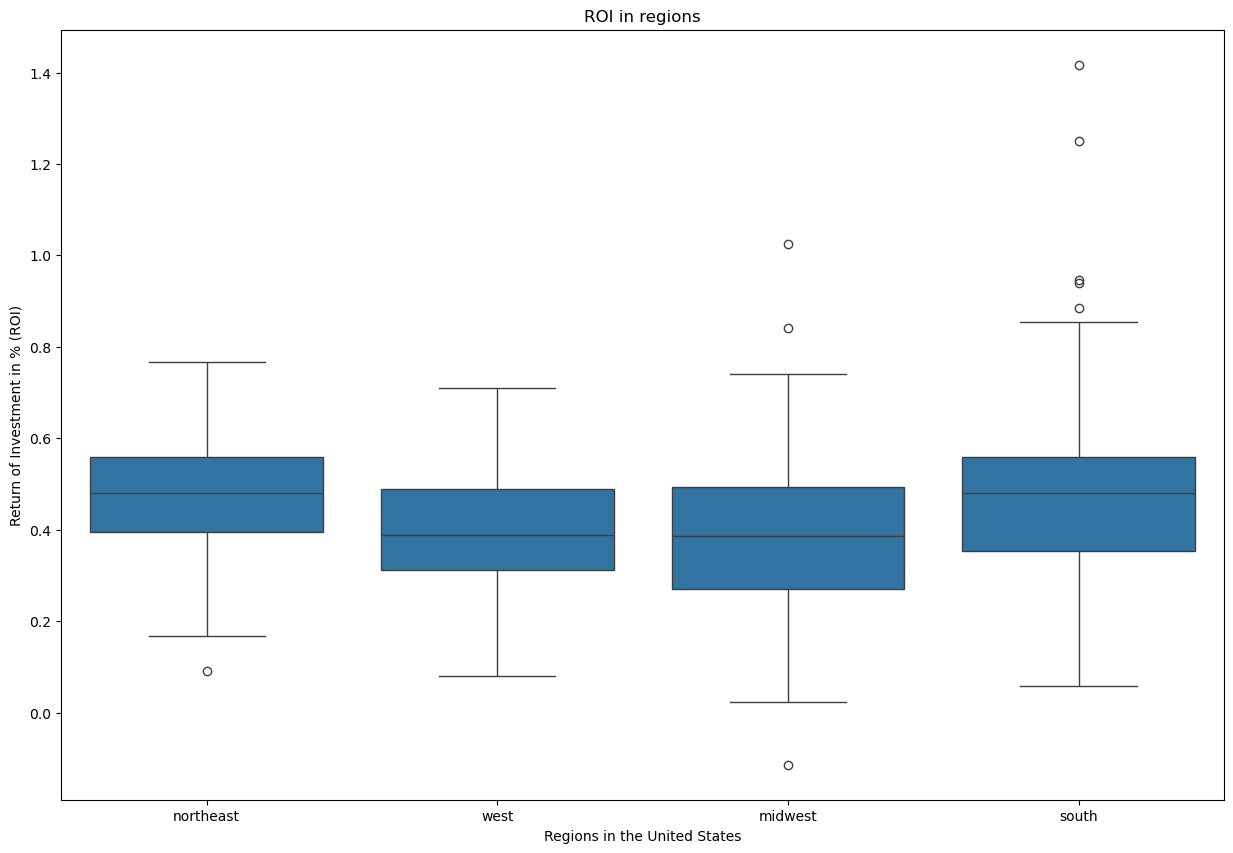

In [36]:
# Create box plots for ROI by region
fig, axes = plt.subplots(figsize=(15, 10))

sns.boxplot(x='region', y='ROI', data=df)
axes.set_title('ROI in regions')
axes.set_xlabel('Regions in the United States')
axes.set_ylabel('Return of Investment in % (ROI)')
plt.show()

## Conclusion for box plots:
Between Quarter 3 of 2019 to Quarter 3 of 2024 in the United States: 
- Northeast has the most return of investment
- South region ranks the second place with very close ROI to the Northeast
- Midwest ranks the last for ROI
- To invest and then sell, purchase houses in northeast and south get around 50% returns of investment in the past 5 years

,ROI
state_name,
LA,0.186154
ND,0.217978
IL,0.219843
WV,0.285849
IA,0.288536
WY,0.298295
CA,0.301775
OK,0.306074
MS,0.327174


Text(0, 0.5, 'Regions')

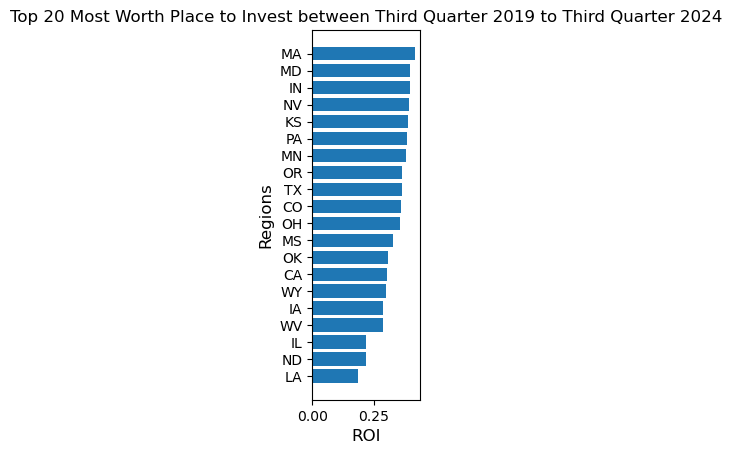

In [39]:
#Table for Top 20 ROI: 
pivot = df.pivot_table(index = ['state_name'],values = ['ROI'])
pivot = pivot.sort_values(by = 'ROI', ascending = True).head(20)
display(pivot)

#Chart for Top 20 ROI:
plt.subplot(1,4,1)
plt.barh(pivot.index,pivot['ROI'])
plt.title('Top 20 Most Worth Place to Invest between Third Quarter 2019 to Third Quarter 2024')
plt.xlabel('ROI',fontsize=12)
plt.ylabel('Regions',fontsize=12)

## Conclusion for bar chart:
Between Quarter 3 of 2019 to Quarter 3 of 2024 in the United States: 
- The top 20 states for return of investment rate is between 18%-41%
- Among the states in Northeast, Massachusetts houses has the most return of investment

## Final Conclusion for Average Profit for Sell: 
1. Northeast and South region have very close high Return of Investment in the past 5 years
2. In Northeast, Masschusetts is the most valuable to invest
3. The top 20 states for return of investment rate is between 18%-41%

Q6) How much average monthly income I could expect from my investments in terms of lease/rent after upgrading properties, paying mortgage, and paying taxes. Calculate my ~ROI.

## Average Monthly Income ROI
Data 1: ZORI(Smoothed): Single Family Residence Time Series($)
Data 2: Median Sale Price(Raw,SFR only,Monthly) 

In [42]:
# Load the Single Family Residence Time Data: 
df_rental = pd.read_csv('data/Metro_zori_uc_sfr_sm_month.csv')
display(df_rental.head(5))  
display(df_rental.tail(5))
display(df_rental.count())

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,0,United States,country,NaN,1263.444318,1269.895092,1278.469237,1288.647487,1298.178017,...,2135.254699,2147.222455,2162.917331,2175.779343,2188.086209,2197.213557,2205.825071,2211.841814,2214.693266,2214.826710
1,394913,1,"New York, NY",msa,NY,2172.350813,2195.448862,2211.980362,2225.518207,2227.878842,...,3389.252812,3423.331146,3468.956765,3479.434471,3504.068770,3512.967752,3535.906708,3546.100645,3518.356703,3509.750205
2,753899,2,"Los Angeles, CA",msa,CA,2529.451523,2543.786170,2562.465252,2573.300077,2597.387056,...,4166.947559,4183.689748,4203.755348,4220.144971,4240.531898,4259.751366,4276.789066,4281.189374,4284.485193,4279.602359
3,394463,3,"Chicago, IL",msa,IL,1505.627017,1511.779272,1522.073950,1534.764157,1547.538133,...,2244.117798,2256.354170,2266.294085,2295.246104,2318.130388,2333.454844,2343.094047,2354.724901,2360.133093,2366.401698
4,394514,4,"Dallas, TX",msa,TX,1370.989564,1379.417484,1389.001222,1403.596165,1416.346007,...,2280.897967,2285.831609,2304.134514,2317.396859,2324.499356,2328.954287,2333.301355,2336.420733,2335.093773,2328.929081


,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
517,394615,847,"Fredericksburg, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2675.000000
518,753923,849,"The Dalles, OR",msa,OR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1740.102792,1778.803237,1835.966779,1941.666667
519,753921,867,"Steamboat Springs, CO",msa,CO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5562.963657,5104.611225,4785.778907,4536.559011,4611.274908,4656.828202,4622.833333
520,394996,915,"Portales, NM",msa,NM,NaN,NaN,NaN,NaN,NaN,...,1094.005403,1069.62567,1058.636768,1072.369019,1100.772818,1136.945351,1136.186990,1128.202788,1118.693907,1123.888889
521,394805,916,"Los Alamos, NM",msa,NM,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2634.324739,2750.000000


RegionID      522
SizeRank      522
RegionName    522
RegionType    522
StateName     521
             ... 
2024-06-30    442
2024-07-31    455
2024-08-31    466
2024-09-30    483
2024-10-31    522
Length: 123, dtype: int64

In [44]:
# List number of rows
print("Before: number of rows: ", df_rental.shape)
 
# Drop the duplicates - (no duplicates found)
df_rental = df_rental.drop_duplicates()
print("After: number of rows: ", df_rental.shape)
 
# Drop Missing/Null Values (no null values found)
print("Sum of null values: ", df_rental.isnull().sum())

# Drop rows with NaN values
display(df_rental.count())
df_rental = df_rental.dropna() 
display(df_rental.count())

display(df_rental.head(5))
display(df_rental.tail(5))

Before: number of rows:  (522, 123)
After: number of rows:  (522, 123)
Sum of null values:  RegionID       0
SizeRank       0
RegionName     0
RegionType     0
StateName      1
              ..
2024-06-30    80
2024-07-31    67
2024-08-31    56
2024-09-30    39
2024-10-31     0
Length: 123, dtype: int64


RegionID      522
SizeRank      522
RegionName    522
RegionType    522
StateName     521
             ... 
2024-06-30    442
2024-07-31    455
2024-08-31    466
2024-09-30    483
2024-10-31    522
Length: 123, dtype: int64

RegionID      168
SizeRank      168
RegionName    168
RegionType    168
StateName     168
             ... 
2024-06-30    168
2024-07-31    168
2024-08-31    168
2024-09-30    168
2024-10-31    168
Length: 123, dtype: int64

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
1,394913,1,"New York, NY",msa,NY,2172.350813,2195.448862,2211.980362,2225.518207,2227.878842,...,3389.252812,3423.331146,3468.956765,3479.434471,3504.068770,3512.967752,3535.906708,3546.100645,3518.356703,3509.750205
2,753899,2,"Los Angeles, CA",msa,CA,2529.451523,2543.786170,2562.465252,2573.300077,2597.387056,...,4166.947559,4183.689748,4203.755348,4220.144971,4240.531898,4259.751366,4276.789066,4281.189374,4284.485193,4279.602359
3,394463,3,"Chicago, IL",msa,IL,1505.627017,1511.779272,1522.073950,1534.764157,1547.538133,...,2244.117798,2256.354170,2266.294085,2295.246104,2318.130388,2333.454844,2343.094047,2354.724901,2360.133093,2366.401698
4,394514,4,"Dallas, TX",msa,TX,1370.989564,1379.417484,1389.001222,1403.596165,1416.346007,...,2280.897967,2285.831609,2304.134514,2317.396859,2324.499356,2328.954287,2333.301355,2336.420733,2335.093773,2328.929081
5,394692,5,"Houston, TX",msa,TX,1492.797146,1498.246621,1505.909295,1517.078518,1528.492786,...,2068.538636,2081.822525,2092.298563,2104.151103,2111.464305,2121.015668,2126.946470,2132.802905,2134.536004,2135.578001


,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
301,395232,308,"Winchester, VA",msa,VA,1145.776587,1153.162526,1164.373918,1168.422721,1162.329486,...,1953.541383,1945.117885,1982.545419,1980.796761,2024.943078,2012.477605,2053.287946,2049.810927,2056.976348,2037.152778
313,394821,320,"Manhattan, KS",msa,KS,1098.990540,1099.689319,1103.371476,1102.054924,1105.422440,...,1331.858102,1327.249427,1341.716096,1341.478901,1357.192014,1368.966765,1391.326380,1396.869926,1397.747972,1385.842232
323,394780,332,"Lawton, OK",msa,OK,705.307577,704.138341,710.523548,709.337651,713.615888,...,1028.806684,1054.191616,1058.888809,1055.043677,1059.004739,1079.286781,1078.384000,1086.909713,1087.883929,1101.883754
366,394462,391,"Cheyenne, WY",msa,WY,1186.886792,1188.676909,1211.724188,1217.124399,1214.192552,...,1724.470977,1744.161450,1740.605355,1751.330335,1778.063663,1792.656120,1792.539381,1774.081339,1775.017612,1780.456031
389,394925,428,"Oak Harbor, WA",msa,WA,1211.511572,1234.470612,1245.467722,1285.180681,1297.759311,...,2416.450227,2409.128380,2412.385991,2457.352131,2491.551026,2525.687512,2538.202551,2543.106779,2558.499234,2527.425926


In [46]:
# Rename column headers to snake_case and more appropriate terms
df_rental = df_rental.rename(columns={"RegionID": "region_id", 
                        "SizeRank": "size_rank", 
                        "RegionName": "metro_area",
                        "RegionType": "region_type",
                        "StateName": "state_name"})
                        
df_rental.head(5)

# View a column to confirm the suspicion that the data is redundant/repeated or simply not needed
display(df_rental['metro_area'].unique())

# Drop unnecessary columns
df_rental = df_rental.drop(["size_rank", "region_type"], axis=1)
display(df_rental.head(5))

array(['New York, NY', 'Los Angeles, CA', 'Chicago, IL', 'Dallas, TX',
       'Houston, TX', 'Washington, DC', 'Philadelphia, PA', 'Miami, FL',
       'Atlanta, GA', 'Boston, MA', 'Phoenix, AZ', 'San Francisco, CA',
       'Riverside, CA', 'Detroit, MI', 'Seattle, WA', 'Minneapolis, MN',
       'San Diego, CA', 'Tampa, FL', 'Denver, CO', 'Baltimore, MD',
       'St. Louis, MO', 'Orlando, FL', 'Charlotte, NC', 'San Antonio, TX',
       'Portland, OR', 'Sacramento, CA', 'Pittsburgh, PA',
       'Cincinnati, OH', 'Austin, TX', 'Las Vegas, NV', 'Kansas City, MO',
       'Columbus, OH', 'Indianapolis, IN', 'Cleveland, OH',
       'San Jose, CA', 'Nashville, TN', 'Virginia Beach, VA',
       'Providence, RI', 'Jacksonville, FL', 'Milwaukee, WI',
       'Oklahoma City, OK', 'Raleigh, NC', 'Memphis, TN', 'Richmond, VA',
       'Louisville, KY', 'New Orleans, LA', 'Salt Lake City, UT',
       'Hartford, CT', 'Buffalo, NY', 'Birmingham, AL',
       'Grand Rapids, MI', 'Tucson, AZ', 'Urban Honolu

,region_id,metro_area,state_name,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
1,394913,"New York, NY",NY,2172.350813,2195.448862,2211.980362,2225.518207,2227.878842,2244.158650,2249.784555,...,3389.252812,3423.331146,3468.956765,3479.434471,3504.068770,3512.967752,3535.906708,3546.100645,3518.356703,3509.750205
2,753899,"Los Angeles, CA",CA,2529.451523,2543.786170,2562.465252,2573.300077,2597.387056,2616.032336,2637.634665,...,4166.947559,4183.689748,4203.755348,4220.144971,4240.531898,4259.751366,4276.789066,4281.189374,4284.485193,4279.602359
3,394463,"Chicago, IL",IL,1505.627017,1511.779272,1522.073950,1534.764157,1547.538133,1556.765533,1558.184208,...,2244.117798,2256.354170,2266.294085,2295.246104,2318.130388,2333.454844,2343.094047,2354.724901,2360.133093,2366.401698
4,394514,"Dallas, TX",TX,1370.989564,1379.417484,1389.001222,1403.596165,1416.346007,1427.186591,1435.273497,...,2280.897967,2285.831609,2304.134514,2317.396859,2324.499356,2328.954287,2333.301355,2336.420733,2335.093773,2328.929081
5,394692,"Houston, TX",TX,1492.797146,1498.246621,1505.909295,1517.078518,1528.492786,1538.965848,1541.572916,...,2068.538636,2081.822525,2092.298563,2104.151103,2111.464305,2121.015668,2126.946470,2132.802905,2134.536004,2135.578001


In [48]:
df_median_sale_price = pd.read_csv('data/Metro_median_sale_price_uc_sfr_month.csv')
df_median_sale_price.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
0,102001,0,United States,country,NaN,167000.0,172800.0,174610.0,177000.0,182000.0,...,325000.0,325000.0,336500.0,349000.0,355000.0,365000.0,375000.0,367951.0,365000.0,359000.0
1,394913,1,"New York, NY",msa,NY,400000.0,395000.0,395000.0,400000.0,405000.0,...,600000.0,600000.0,595000.0,600000.0,620000.0,645000.0,675000.0,675000.0,675000.0,665000.0
2,753899,2,"Los Angeles, CA",msa,CA,500000.0,483000.0,487000.0,470000.0,455000.0,...,890000.0,885000.0,940000.0,943000.0,970000.0,1000000.0,988000.0,975000.0,950000.0,931500.0
3,394463,3,"Chicago, IL",msa,IL,215000.0,222000.0,224000.0,230000.0,239000.0,...,285000.0,284900.0,290000.0,308000.0,320000.0,329000.0,344950.0,339900.0,325000.0,325000.0
4,394514,4,"Dallas, TX",msa,TX,138048.0,146680.0,145000.0,150000.0,156500.0,...,370000.0,370000.0,383000.0,395000.0,400000.0,407500.0,405000.0,400000.0,395000.0,385000.0


In [50]:
# List number of rows
print("Before: number of rows: ", df_median_sale_price.shape)
 
# Drop the duplicates
df_median_sale_price = df_median_sale_price.drop_duplicates()
print("After: number of rows: ", df_median_sale_price.shape)
 
# Drop Missing/Null Values 
print("Sum of null values: ", df_median_sale_price.isnull().sum())

# Drop rows with NaN values
display(df_median_sale_price.count())
df_median_sale_price = df_median_sale_price.dropna() 
display(df_median_sale_price.count())

display(df_median_sale_price.head(5))
display(df_median_sale_price.tail(5))

Before: number of rows:  (720, 205)
After: number of rows:  (720, 205)
Sum of null values:  RegionID       0
SizeRank       0
RegionName     0
RegionType     0
StateName      1
              ..
2024-05-31    10
2024-06-30    10
2024-07-31     7
2024-08-31     3
2024-09-30     0
Length: 205, dtype: int64


RegionID      720
SizeRank      720
RegionName    720
RegionType    720
StateName     719
             ... 
2024-05-31    710
2024-06-30    710
2024-07-31    713
2024-08-31    717
2024-09-30    720
Length: 205, dtype: int64

RegionID      445
SizeRank      445
RegionName    445
RegionType    445
StateName     445
             ... 
2024-05-31    445
2024-06-30    445
2024-07-31    445
2024-08-31    445
2024-09-30    445
Length: 205, dtype: int64

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
1,394913,1,"New York, NY",msa,NY,400000.0,395000.0,395000.0,400000.0,405000.0,...,600000.0,600000.0,595000.0,600000.0,620000.0,645000.0,675000.0,675000.0,675000.0,665000.0
2,753899,2,"Los Angeles, CA",msa,CA,500000.0,483000.0,487000.0,470000.0,455000.0,...,890000.0,885000.0,940000.0,943000.0,970000.0,1000000.0,988000.0,975000.0,950000.0,931500.0
3,394463,3,"Chicago, IL",msa,IL,215000.0,222000.0,224000.0,230000.0,239000.0,...,285000.0,284900.0,290000.0,308000.0,320000.0,329000.0,344950.0,339900.0,325000.0,325000.0
4,394514,4,"Dallas, TX",msa,TX,138048.0,146680.0,145000.0,150000.0,156500.0,...,370000.0,370000.0,383000.0,395000.0,400000.0,407500.0,405000.0,400000.0,395000.0,385000.0
6,395209,6,"Washington, DC",msa,VA,355000.0,347000.0,345000.0,350000.0,350000.0,...,525001.0,510000.0,545000.0,580000.0,615000.0,625000.0,624000.0,610000.0,596500.0,580000.0


,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
594,753889,645,"Hillsdale, MI",msa,MI,85900.0,82200.0,61950.0,77000.0,65000.0,...,124000.0,150000.0,161000.0,130000.0,199000.0,162000.0,187600.0,187500.0,175000.0,162550.0
611,394779,665,"Lawrenceburg, TN",msa,TN,73250.0,69419.0,57000.0,58750.0,78500.0,...,150000.0,199900.0,205000.0,212000.0,220000.0,193000.0,250000.0,219900.0,200000.0,236053.0
629,394845,690,"McMinnville, TN",msa,TN,63500.0,65000.0,64500.0,72500.0,61650.0,...,200000.0,230000.0,225900.0,225000.0,225000.0,234000.0,238750.0,226950.0,230000.0,252000.0
663,394745,744,"Kill Devil Hills, NC",msa,NC,302500.0,345000.0,327000.0,355000.0,355000.0,...,714500.0,655000.0,625000.0,615000.0,620000.0,680000.0,625000.0,657500.0,700000.0,660000.0
682,394786,783,"Lewisburg, TN",msa,TN,85850.0,107844.0,101267.0,85000.0,80000.0,...,330450.0,239900.0,348250.0,267000.0,312900.0,322500.0,345850.0,354200.0,285500.0,375000.0


In [52]:
# Rename column headers to snake_case and more appropriate terms
df_median_sale_price = df_median_sale_price.rename(columns={"RegionID": "region_id", 
                        "SizeRank": "size_rank", 
                        "RegionName": "metro_area",
                        "RegionType": "region_type",
                        "StateName": "state_name"})
                        
df_median_sale_price.head(5)

# View a column to confirm the suspicion that the data is redundant/repeated or simply not needed
display(df_median_sale_price['metro_area'].unique())

# Drop unnecessary columns
df_median_sale_price = df_median_sale_price.drop(["size_rank", "region_type"], axis=1)
display(df_median_sale_price.head(5))

array(['New York, NY', 'Los Angeles, CA', 'Chicago, IL', 'Dallas, TX',
       'Washington, DC', 'Philadelphia, PA', 'Miami, FL', 'Atlanta, GA',
       'Boston, MA', 'Phoenix, AZ', 'San Francisco, CA', 'Riverside, CA',
       'Detroit, MI', 'Seattle, WA', 'Minneapolis, MN', 'San Diego, CA',
       'Tampa, FL', 'Denver, CO', 'Baltimore, MD', 'St. Louis, MO',
       'Orlando, FL', 'Charlotte, NC', 'San Antonio, TX', 'Portland, OR',
       'Sacramento, CA', 'Pittsburgh, PA', 'Cincinnati, OH', 'Austin, TX',
       'Las Vegas, NV', 'Kansas City, MO', 'Indianapolis, IN',
       'Cleveland, OH', 'San Jose, CA', 'Nashville, TN',
       'Virginia Beach, VA', 'Providence, RI', 'Jacksonville, FL',
       'Milwaukee, WI', 'Oklahoma City, OK', 'Raleigh, NC', 'Memphis, TN',
       'Richmond, VA', 'Louisville, KY', 'New Orleans, LA',
       'Salt Lake City, UT', 'Hartford, CT', 'Buffalo, NY',
       'Birmingham, AL', 'Rochester, NY', 'Grand Rapids, MI',
       'Tucson, AZ', 'Urban Honolulu, HI', 'Tuls

,region_id,metro_area,state_name,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
1,394913,"New York, NY",NY,400000.0,395000.0,395000.0,400000.0,405000.0,420000.0,417000.0,...,600000.0,600000.0,595000.0,600000.0,620000.0,645000.0,675000.0,675000.0,675000.0,665000.0
2,753899,"Los Angeles, CA",CA,500000.0,483000.0,487000.0,470000.0,455000.0,437000.0,424500.0,...,890000.0,885000.0,940000.0,943000.0,970000.0,1000000.0,988000.0,975000.0,950000.0,931500.0
3,394463,"Chicago, IL",IL,215000.0,222000.0,224000.0,230000.0,239000.0,235000.0,235000.0,...,285000.0,284900.0,290000.0,308000.0,320000.0,329000.0,344950.0,339900.0,325000.0,325000.0
4,394514,"Dallas, TX",TX,138048.0,146680.0,145000.0,150000.0,156500.0,154305.0,150000.0,...,370000.0,370000.0,383000.0,395000.0,400000.0,407500.0,405000.0,400000.0,395000.0,385000.0
6,395209,"Washington, DC",VA,355000.0,347000.0,345000.0,350000.0,350000.0,340000.0,325000.0,...,525001.0,510000.0,545000.0,580000.0,615000.0,625000.0,624000.0,610000.0,596500.0,580000.0


In [54]:
# Drop any column over 5 years old
df_rental_dropped= df_rental.drop(df.columns[4:-61], axis=1)
display(df.head(5))

df_median_sale_price_dropped=df_median_sale_price.drop(df.columns[4:-61], axis=1)
display(df.head(5))

,metro_area,state_name,region,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,...,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,sale_income,ROI
1,"New York, NY",NY,northeast,413500.0,410000.0,410500.0,420000.0,423051.0,407500.0,415500.0,...,595000.0,600000.0,620000.0,645000.0,675000.0,675000.0,675000.0,665000.0,251500.0,0.503012
2,"Los Angeles, CA",CA,west,685500.0,680000.0,680000.0,691000.0,685000.0,705000.0,725000.0,...,940000.0,943000.0,970000.0,1000000.0,988000.0,975000.0,950000.0,931500.0,246000.0,0.269965
3,"Chicago, IL",IL,midwest,234900.0,235000.0,235000.0,234000.0,227000.0,231000.0,253000.0,...,290000.0,308000.0,320000.0,329000.0,344950.0,339900.0,325000.0,325000.0,90100.0,0.293054
4,"Dallas, TX",TX,south,262000.0,260000.0,259900.0,265000.0,256000.0,262000.0,270000.0,...,383000.0,395000.0,400000.0,407500.0,405000.0,400000.0,395000.0,385000.0,123000.0,0.373332
6,"Washington, DC",VA,south,405000.0,415900.0,420000.0,420000.0,400000.0,419900.0,445000.0,...,545000.0,580000.0,615000.0,625000.0,624000.0,610000.0,596500.0,580000.0,175000.0,0.338410


,metro_area,state_name,region,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,...,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,sale_income,ROI
1,"New York, NY",NY,northeast,413500.0,410000.0,410500.0,420000.0,423051.0,407500.0,415500.0,...,595000.0,600000.0,620000.0,645000.0,675000.0,675000.0,675000.0,665000.0,251500.0,0.503012
2,"Los Angeles, CA",CA,west,685500.0,680000.0,680000.0,691000.0,685000.0,705000.0,725000.0,...,940000.0,943000.0,970000.0,1000000.0,988000.0,975000.0,950000.0,931500.0,246000.0,0.269965
3,"Chicago, IL",IL,midwest,234900.0,235000.0,235000.0,234000.0,227000.0,231000.0,253000.0,...,290000.0,308000.0,320000.0,329000.0,344950.0,339900.0,325000.0,325000.0,90100.0,0.293054
4,"Dallas, TX",TX,south,262000.0,260000.0,259900.0,265000.0,256000.0,262000.0,270000.0,...,383000.0,395000.0,400000.0,407500.0,405000.0,400000.0,395000.0,385000.0,123000.0,0.373332
6,"Washington, DC",VA,south,405000.0,415900.0,420000.0,420000.0,400000.0,419900.0,445000.0,...,545000.0,580000.0,615000.0,625000.0,624000.0,610000.0,596500.0,580000.0,175000.0,0.338410


In [56]:
# Set index:
df_rental_dropped = df_rental_dropped.set_index('metro_area')
df_median_sale_price_dropped = df_median_sale_price_dropped.set_index('metro_area')

In [58]:
# Merge two dataframes: 
df_merged = pd.merge(df_rental.iloc[:,-1], df_median_sale_price.iloc[:,-1], left_index=True, right_index=True)
df_merged = pd.merge(df_rental.iloc[:,0], df_merged, left_index=True, right_index=True)

df_merged.rename(columns={df_merged.columns[0]: 'Metro_area', 
                          df_merged.columns[1]: 'Monthly_Rent', 
                          df_merged.columns[2]: 'Sale_price'}, inplace=True)
display(df_merged.head(5))

,Metro_area,Monthly_Rent,Sale_price
1,394913,3509.750205,665000.0
2,753899,4279.602359,931500.0
3,394463,2366.401698,325000.0
4,394514,2328.929081,385000.0
6,395209,3074.618169,580000.0


In [ ]:
Calculate ROI in Rental:
Assumption:

Downpayment: 20% of the sale price
Closing costs = $2500
Remodeling: 5% of the sale price
Mortage rate: 6%
taxes: increase 1% of the sale price every year
insurances: increase 1% of the sale price every year

In [60]:
def roi_cal(average_month_rent,avg_sale_price):
    downpayment = avg_sale_price * 0.2
    closing_costs = 2500
    remodeling = avg_sale_price * 0.05
    investment = downpayment + closing_costs + remodeling
    
    # Monthly Mortage Payment: 
    principle = avg_sale_price - downpayment
    interest_rate = 0.06
    r = interest_rate / 12 # monthly interest rate
    n = 360 #number of monthly payments
    
    mortage_payment = (principle * r * (1+r) **n) / ((1+r)**n - 1)

    # Monthly costs of insurance and property taxes:
    annual_insurance = avg_sale_price * 0.01
    annual_taxes = avg_sale_price * 0.01
    monthly_expenses = (annual_insurance + annual_taxes) /12

    monthly_cash_flow = avg_month_rent - mortage_payment - monthly_expenses
    annual_returen = monthly_cash_flow * 12

    #ROI for Rentals: 
    ROI = annual_return / investment
    return ROI 
    
display(roi_cal)

<function __main__.roi_cal(average_month_rent, avg_sale_price)>

In [62]:
def add_calculated_ROI_column(df): 
    df['ROI'] = df.apply(lambda row:calc_ROI(row[df.colunns[1]],row[df.columns[2]]),axis = 1)
    return df
    add_calculated_ROI_column(df_merged)
    df_merged = df_merged.sort_values(by='ROI',ascending = False)
    df_merged.head(20)
    display(add_calculated_ROI_column)